In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory = False)

In [4]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7855 entries, 0 to 7854
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7855 non-null   int64  
 1   NAME                            7792 non-null   object 
 2   host id                         7855 non-null   int64  
 3   host_identity_verified          7782 non-null   object 
 4   host name                       7832 non-null   object 
 5   neighbourhood group             7828 non-null   object 
 6   neighbourhood                   7839 non-null   object 
 7   lat                             7847 non-null   float64
 8   long                            7847 non-null   float64
 9   country                         7805 non-null   object 
 10  country code                    7776 non-null   object 
 11  instant_bookable                7776 non-null   object 
 12  cancellation_policy             78

In [7]:
df.duplicated().value_counts()

False    7855
Name: count, dtype: int64

In [8]:
df[df['neighbourhood group'] == 'brookln']

id                                            NAME      host id  \
13  1008516  Lovely Room 1, Garden, Best Area, Legal rental  26802410424   

   host_identity_verified host name neighbourhood group neighbourhood  \
13               verified     Darcy             brookln   South Slope   

         lat      long        country  ... service fee minimum nights  \
13  40.66829 -73.98779  United States  ...       $116             4.0   

   number of reviews last review  reviews per month review rate number  \
13             167.0   6/24/2019               1.34                4.0   

   calculated host listings count  availability 365  house_rules license  
13                            3.0              47.0          NaN     NaN  

[1 rows x 26 columns]

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.drop(['house_rules','license'], axis = 1,inplace = True)

In [12]:
df['price'] = df['price'].str.replace('$','' , regex = False)

In [15]:
df['service fee'] = df['service fee'].str.replace('$','', regex = False)

In [16]:
df['price'] = df['price'].str.replace('$','', regex = False)
df['service fee'] = df['service fee'].str.replace(',','', regex = False)

In [17]:
df.rename(columns = {
    'price' : 'price_$',
    'service fee' : 'service_fee_$'
}, inplace = True)


In [18]:
df.dropna(inplace = True)

In [20]:
df['price_$'] = df['price_$'].str.replace(',','', regex = False).astype(float)
df['service_fee_$'] = df['service_fee_$'].str.replace(',','', regex = False).astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [22]:
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

In [24]:
df = df.drop(df[df['availability 365']>500].index)

In [27]:
df.duplicated().value_counts()

False    6372
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 0 to 7854
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6372 non-null   object        
 1   NAME                            6372 non-null   object        
 2   host id                         6372 non-null   object        
 3   host_identity_verified          6372 non-null   object        
 4   host name                       6372 non-null   object        
 5   neighbourhood group             6372 non-null   object        
 6   neighbourhood                   6372 non-null   object        
 7   lat                             6372 non-null   float64       
 8   long                            6372 non-null   float64       
 9   country                         6372 non-null   object        
 10  country code                    6372 non-null   object        
 11  instant_b

In [29]:
df.describe()

lat         long  Construction year      price_$  \
count  6372.000000  6372.000000        6372.000000  6372.000000   
mean     40.729033   -73.958622        2012.427338   617.400345   
min      40.508680   -74.239860        2003.000000    50.000000   
25%      40.688195   -73.983550        2007.000000   321.000000   
50%      40.722630   -73.958595        2012.000000   616.000000   
75%      40.764305   -73.942940        2017.000000   913.000000   
max      40.908040   -73.729010        2022.000000  1200.000000   
std       0.052505     0.036540           5.781282   337.529715   

       service_fee_$  minimum nights  number of reviews  \
count    6372.000000     6372.000000        6372.000000   
mean      123.481795        8.683930          53.925455   
min        10.000000      -12.000000           1.000000   
25%        64.000000        2.000000           7.000000   
50%       123.000000        3.000000          22.000000   
75%       183.000000        5.000000          73.000000   
max       240.000000     1250.000000         607.000000   
std        67.511456       28.838885          71.697213   

                         last review  reviews per month  review rate number  \
count                           6372        6372.000000         6372.000000   
mean   2018-04-29 04:29:49.830508544           0.893967            3.013340   
min              2012-07-11 00:00:00           0.010000            1.000000   
25%              2017-05-14 12:00:00           0.130000            2.000000   
50%              2019-03-27 00:00:00           0.400000            3.000000   
75%              2019-06-19 00:00:00           1.240000            4.000000   
max              2022-05-21 00:00:00          13.450000            5.000000   
std                              NaN           1.144240            1.422396   

       calculated host listings count  availability 365  
count                     6372.000000       6372.000000  
mean                         2.786409        207.508788  
min                          1.000000        -10.000000  
25%                          1.000000         96.000000  
50%                          1.000000        209.000000  
75%                          2.000000        317.000000  
max                         96.000000        426.000000  
std                          7.129983        126.265733

In [30]:
property_types = df['room type'].value_counts().to_frame()
property_types

count
room type             
Entire home/apt   3819
Private room      2471
Shared room         82

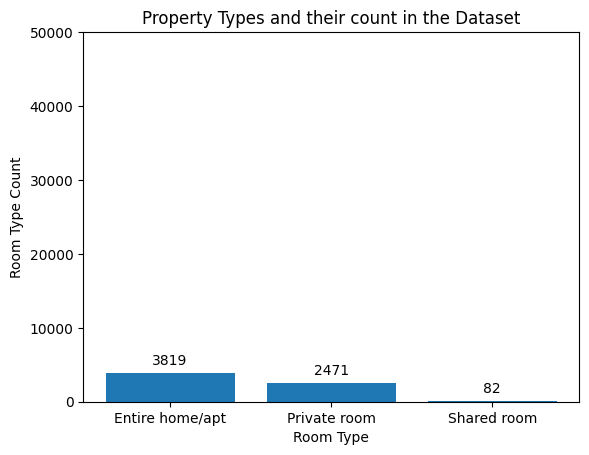

In [31]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels = property_types.loc[:,'count'],padding = 4 );
plt.ylim([0,50000]);
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset');

In [32]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

count
neighbourhood group       
Manhattan             2902
Brooklyn              2850
Queens                 493
Bronx                   95
Staten Island           32

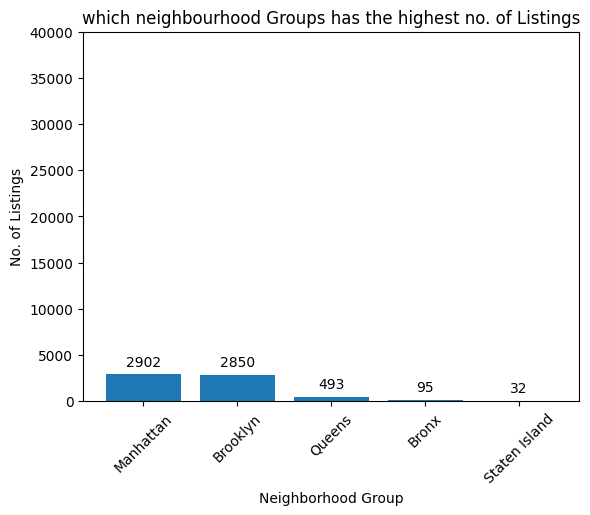

In [33]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar,labels = hood_group.loc[:,'count'],padding = 4 );
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group')
plt.ylabel('No. of Listings')
plt.xticks(rotation = 45);
plt.title('which neighbourhood Groups has the highest no. of Listings');

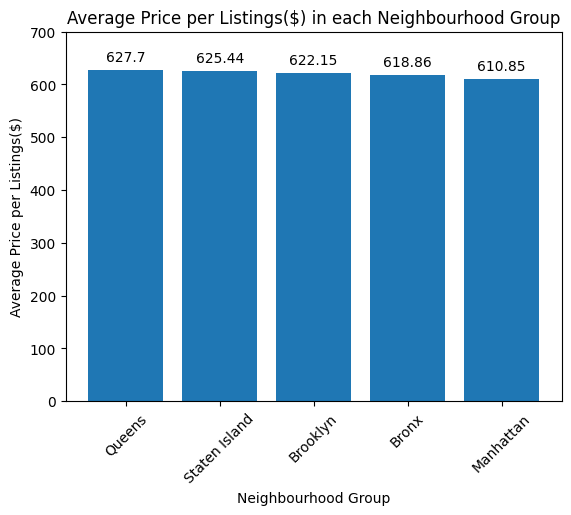

In [34]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels = round(avg_price.loc[:,'price_$'],2), label_type = 'edge' , padding = 4 );
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listings($)')
plt.xticks(rotation = 45);
plt.title('Average Price per Listings($) in each Neighbourhood Group');

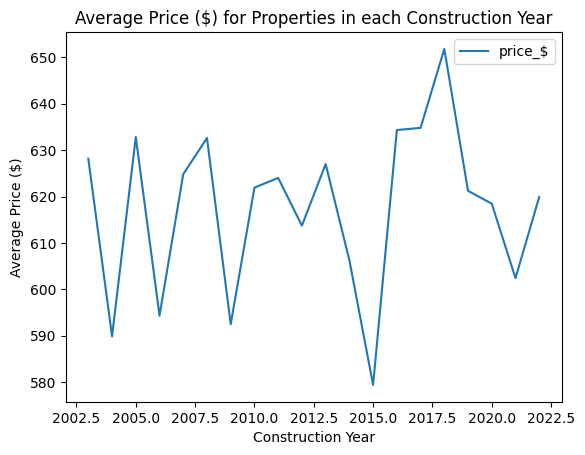

In [36]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year');

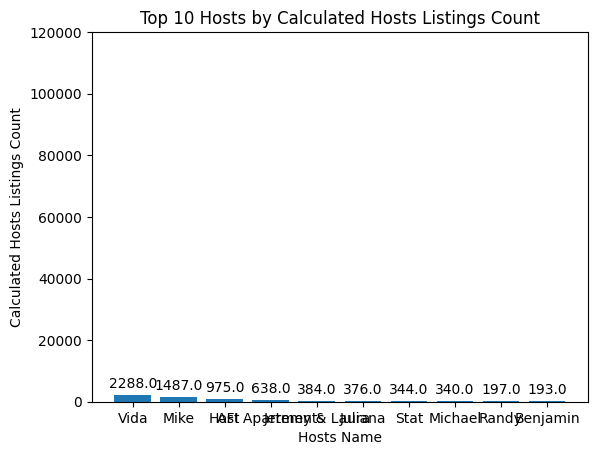

In [38]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, labels = hosts.loc[:,'calculated host listings count'], label_type = 'edge' , padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Hosts Listings Count');
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Hosts Listings Count');

In [41]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

review rate number
host_identity_verified                    
unconfirmed                       3.026841
verified                          2.999684

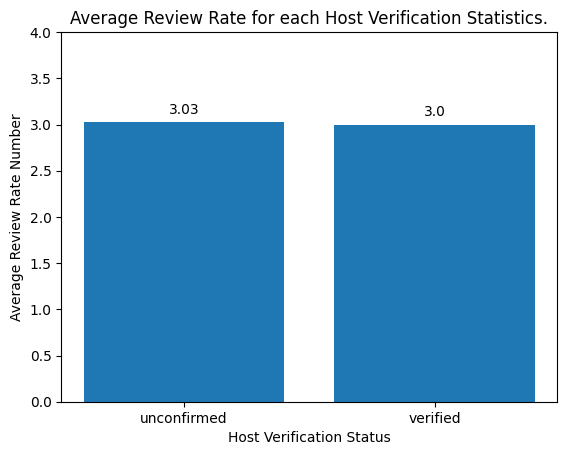

In [42]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels = round(review.loc[:,'review rate number'],2), padding = 4 );
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Host Verification Statistics.');

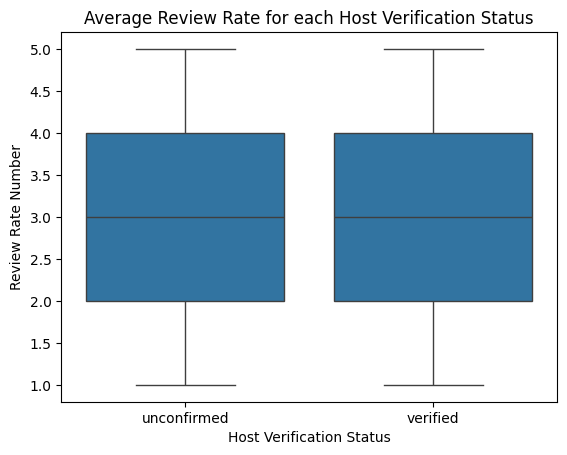

In [44]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Host Verification Status');


In [46]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999913707372291)

Text(0.5, 1.0, 'A Regression Plot Showing the Correlation of the Price of a listing and its service fee')

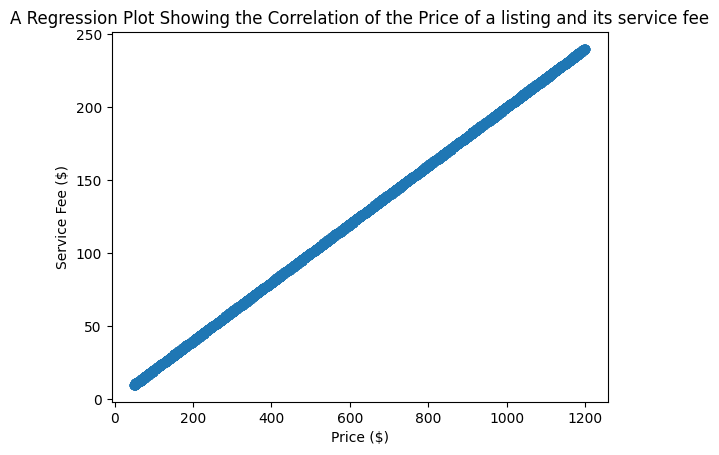

In [47]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title("A Regression Plot Showing the Correlation of the Price of a listing and its service fee")

In [50]:
ARRN = df.groupby(['neighbourhood group' , 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.964286
                    Private room               2.968750
                    Shared room                1.333333
Brooklyn            Entire home/apt            2.975338
                    Private room               3.111111
                    Shared room                2.636364
Manhattan           Entire home/apt            3.021984
                    Private room               2.993939
                    Shared room                2.936170
Queens              Entire home/apt            2.873786
                    Private room               3.057762
                    Shared room                3.500000
Staten Island       Entire home/apt            2.941176
                    Private room               2.466667

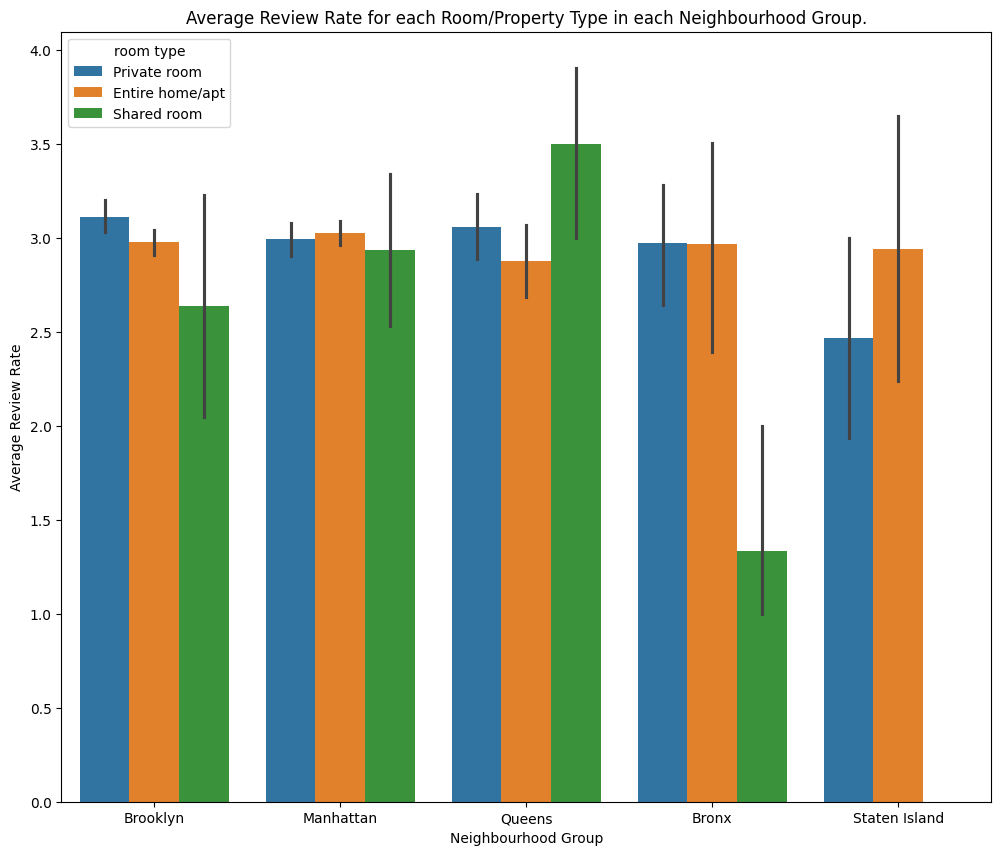

In [52]:
plt.figure(figsize = [12,10]);
sns.barplot(data= df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

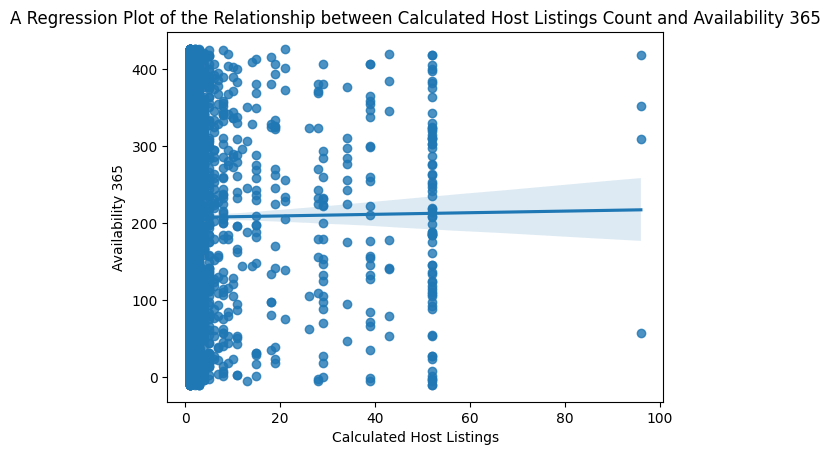

In [54]:
sns.regplot(df, x = 'calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [56]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.005883996391883702)